In [184]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split

from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

from sklearn.model_selection import train_test_split
import keras.utils as utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras

In [ ]:
model = VGG16(weights='imagenet', include_top = True)

# 네트워크 구조 확인
- 분류해야할 클래스 = 1000개
- 1억 8천만개의 파라미터

In [ ]:
model.summary()

In [ ]:
print(224 * 224 * 3)

# 150528 차원에서 25088 차원 까지 줄인 것

In [ ]:
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img)

# 데이터는 0 ~ 255로 읽음
print(x.shape)
print(x)

# opencv로 읽으면 uint8 인데 , 다른걸로 읽으면 float32 타입임 -> 최댓값을 1로 해석함 : 범위 초과 -> 다 하얀색으로 나옴
plt.imshow(x / 255.0)

In [ ]:
# CNN에 넣을려면 무조건 '4차원' 으로 만들어야함 !!
# (224, 224, 3)  ->  (1, 224, 224, 3) : sample수 1개 , 컬러 3 channel

x = np.expand_dims(x, axis = 0)
print(x.shape)

In [ ]:
# 특정 이미지 넷을 분류할 수 있는 클래스에 소속되어 있는 함수
x = preprocess_input(x)

print(x.shape)
print(x)
plt.imshow(x[0,:,:,:] / 255.0)

In [ ]:
# 최종 출력 까지 가는 것이 predict : 1000개의 값이 나와야함.
# row = 샘플수 / columns = 클래스 수

pred = model.predict(x)
print(pred)
print(pred.shape)
plt.plot(pred[0,:])

In [ ]:
# 284 번째 이미지인 것
print(np.argmax(pred))

In [ ]:
print('Predicted:', decode_predictions(pred, top = 3)[0])

# 코끼리

In [ ]:
img_path = 'elep.jpg'
img = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img)

# 데이터는 0 ~ 255로 읽음
print(x.shape)
print(x)

# opencv로 읽으면 uint8 인데 , 다른걸로 읽으면 float32 타입임 -> 최댓값을 1로 해석함 : 범위 초과 -> 다 하얀색으로 나옴
plt.imshow(x / 255.0)

In [ ]:
x = np.expand_dims(x, axis = 0)
print(x.shape)

In [ ]:
x = preprocess_input(x)

print(x.shape)
print(x)
plt.imshow(x[0,:,:,:] / 255.0)

In [ ]:
pred = model.predict(x)
print(pred)
print(pred.shape)
print(np.argmax(pred))
plt.plot(pred[0,:])

In [ ]:
r = decode_predictions(pred, top = 3)[0]
print(r[0][1],',', r[0][2])

# json 파일 파이썬으로 불러오기 -> 딕셔너리 타입

In [ ]:
import json
json_data = json.load(open('imagenet_class_index.json'))
# print(json_data)
print(json_data['0'])

In [ ]:
json_data[f"{np.argmax(pred)}"][1]

# 이미지를 (VGG16)모델에 대해 누군지 확인할때 코드

In [ ]:
img = cv2.imread('elep.jpg')
img = cv2.resize(img, (224, 224))
img = img.reshape(-1, 224, 224, 3)
print(img.shape)
# img = preprocess_input(img)
pred = model.predict(img)
json_data[f"{np.argmax(pred)}"][1]

# 번역기 사용
- googletrans -> google 번역기 API : 무료 버전 : 하루 사용 갯수 제한
- 영어를 한국어로

In [ ]:
from googletrans import Translator

translator = Translator()
result = translator.translate('African_elephant', dest = 'ko')
print(result.text)

In [ ]:
import pickle

with open("hdict.bin","rb") as fr:
    hdict2 = pickle.load(fr)
print(hdict2)

In [ ]:
def toKor(word) :
    word = word.replace("_", " ")
    translator = Translator()
    result = translator.translate(word, dest="ko")
    return result.text

In [ ]:
toKor(json_data[f"{np.argmax(pred)}"][1])

# RESNET, 네트워크 구조
- 얘도 잘 인식함

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights = 'imagenet')

In [ ]:
model2.summary()

In [ ]:
img = cv2.imread('elep.jpg')
img = cv2.resize(img, (224, 224))
img = img.reshape(-1, 224, 224, 3)
print(img.shape)
img = preprocess_input(img)
pred = model2.predict(img)
json_data[f"{np.argmax(pred)}"][1]


# 인셉션v3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
model3 = InceptionV3(weights='imagenet')

In [ ]:
model3.summary()

In [ ]:
img = cv2.imread('result.jpg')
img = cv2.resize(img, (224, 224))
img = img.reshape(-1, 224, 224, 3)
print(img.shape)
img = preprocess_input(img)
pred = model3.predict(img)
r = json_data[  f"{np.argmax(pred)}"  ][1]
r = toKor(r)
print(r)

# Web
- 사진 캡쳐 후 인식
- Resnet 활용

In [ ]:
%%writefile server.py


import flask
from flask import Flask, render_template, url_for, request
import base64
import numpy as np
import cv2
from keras.models import load_model
import io 
import pickle
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import json


init_Base64 = 22       #   data:image/png;base64로 시작 / jpg는 22
app = Flask(__name__)


@app.route('/')
def home():
    return "ok~~"


@app.route('/image', methods=['POST'])
def upload():
    with open("hdict.bin","rb") as fr:
        hdict = pickle.load(fr)
    
    draw = request.form['photo_cap']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype = "uint8")
        
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    image = image.reshape(-1, 224, 224, 3)
    
    model = ResNet50(weights = 'imagenet')
    image = preprocess_input(image)
    pred = model.predict(image)
    
    json_data = json.load(open('imagenet_class_index.json'))
    r = hdict[np.argmax(pred)]
    
    return f"인식결과 : {r}"
    
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port = 8000)

# 가짜데이터를 만드는 방법 : Data Augmentation (데이터 증강)

In [90]:
data_aug_gen = ImageDataGenerator(rescale=1./255)   # 모든 데이터를 정규화 시키겠다.

train_generator = data_aug_gen.flow_from_directory(
        './hard_handwriting_shape/train',
        target_size = (24,24),
        batch_size=3,           
        class_mode='categorical')     # categorical -> 원핫 인코딩 돼서 넘어옴 / binary -> 0,1,2,3, 레이블로 줌



Found 45 images belonging to 3 classes.


In [91]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), 
                activation= 'relu',
                input_shape = (24,24,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습시키기

In [93]:
model.fit_generator(
    train_generator,
    steps_per_epoch=10,  # 데이터 만들어 내기 -> 한 에포크를 15개로 나눠서 학습시켜라
    epochs = 5)

Epoch 1/5
10/10 [==============================] - 0s 11ms/step - loss: 0.3731 - accuracy: 0.9667
Epoch 2/5
10/10 [==============================] - 0s 10ms/step - loss: 0.1346 - accuracy: 0.9667
Epoch 3/5
10/10 [==============================] - 0s 11ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000


In [94]:
test_datagen = ImageDataGenerator(rescale = 1./255)   #  데이터 뻥튀기를 하는데, 생성할때 0~1로 정규화 해서 나오게 하겠다.

test_generator = test_datagen.flow_from_directory(
        './hard_handwriting_shape/test',
        target_size = (24,24),
        batch_size=3,           
        class_mode='categorical', shuffle = False)   

Found 15 images belonging to 3 classes.


# 테스트 데이터로 해보니 인식률이 100%다
- test_easy는 train 데이터와 비슷해서 100% 가 나왔지만
- test 는 train 데이터와 달라서 인식률이 33% 다.
- 동일한 알고리즘을 사용해서 어떻게 성능을 개선시킬것이냐?!

In [95]:
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

0.3333333432674408


# 고양이로 연습

In [21]:
img = cv2.imread('cat.jpg')
img = np.expand_dims(img, 0)

# plt.imshow -> 일반 파이썬이라 RGB임
# plt.imshow(img[0]/255)


In [22]:
generator = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2)

obj = generator.flow(img, batch_size = 1)   # 이미지 1개니까 그냥 1로
                                    
print(obj)                                   # 아직 obj는 영상이 아님

In [23]:
# next -> 데이터를 가져와주세요 라는 의미
image = next(obj)

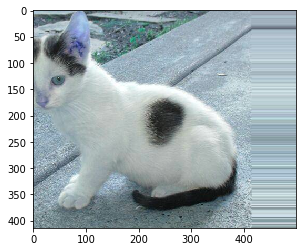

In [24]:
# RGB임
# print(image)
# print(image.shape)
# rescale factor쓰면 '/255' 안해도됨

# opencv로 이미지를 읽어오면 BGR이라 그냥 읽으면 푸르스름함

plt.imshow(image[0])

In [10]:
generator = ImageDataGenerator(
    horizontal_flip = True, 
    vertical_flip = True, 
    width_shift_range = 0.2, 
    rescale = 1./255,                 # rescale 은 모든 데이터에 적용
    zoom_range = [0.5 , 1.5]  )       # random 하게 적용

obj = generator.flow(img, batch_size =1)

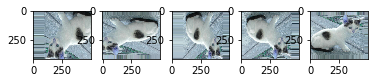

In [11]:
for i in range(5) : 
    image = next(obj)
    plt.subplot(1,5, i+1)

    plt.imshow(image[0])

# 먼저 어떤 연산을 할건지 정의하는 함수

In [55]:
data_aug_gen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 10,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                 shear_range = 0.5,
                                 zoom_range = [0.8, 2.0],
                                 horizontal_flip = True,
                                 vertical_flip = True,        # 
                                 fill_mode = 'nearest')

obj = data_aug_gen.flow(img, batch_size = 1)

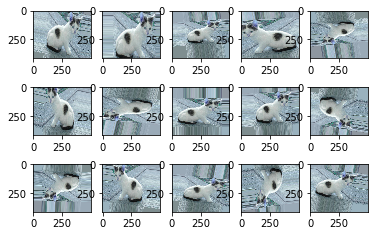

In [56]:
for i in range(15) : 
    image = next(obj)
    plt.subplot(3, 5, i+1)

    plt.imshow(image[0])

# 폴더로부터 다 적용

In [85]:
train_generator = data_aug_gen.flow_from_directory(
        './hard_handwriting_shape/train',
        target_size = (24,24),
        batch_size=10,           
        class_mode='categorical',
        save_to_dir = 'tmp',
        save_prefix = 'image',
        save_format = 'jpg')   

Found 45 images belonging to 3 classes.


In [86]:
result = next(train_generator)

In [48]:
image = np.array(result[0])
label = result[1] 

In [49]:
# 데이터 뻥튀기 완료!

print(image.shape)
print(label)       # 원핫 인코딩 돼서 나옴 ,class mode = categorical

(5, 24, 24, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 학습시키는 셀 , 데이터 증강 후 학습 다시 시킴

In [88]:
# 학습 모델 설정 코너(CNN)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), 
                activation= 'relu',
                input_shape = (24,24,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



# 그냥 어떤 연산 할건지 지정해주는 코너
data_aug_gen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 10,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                 shear_range = 0.5,
                                 zoom_range = [0.8, 2.0],
                                 horizontal_flip = True,
                                 vertical_flip = True,        # 
                                 fill_mode = 'nearest')


# 실제 학습 코너
train_generator = data_aug_gen.flow_from_directory(
        './hard_handwriting_shape/train',
        target_size = (24,24),
        batch_size = 1,           
        class_mode = 'categorical', shuffle = False)  


# 학습 결과 확인 코너
model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs= 30)


# 실제 test 데이터로 정확도 확인
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

Found 45 images belonging to 3 classes.
Epoch 1/30
3/3 [==============================] - 0s 4ms/step - loss: 4.4434 - accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 1.7003 - accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 1.2178 - accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 1.1136 - accuracy: 0.3333
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 1.1035 - accuracy: 0.3333
Epoch 6/30
3/3 [==============================] - 0s 5ms/step - loss: 1.0841 - accuracy: 0.3333
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0877 - accuracy: 0.6667
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 1.0433 - accuracy: 0.6667
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 1.0516 - accuracy: 0.3333
Epoch 10/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.6667

In [97]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(

    './hard_handwriting_shape/test',
    target_size = (24, 24)
    batch_size = 1,
    class_mode = 'categorical'
    shuffle = False
)

SyntaxError: invalid syntax (<ipython-input-97-d3d2fc5d799f>, line 7)

# 사용자 정의 함수

In [99]:
def myFunc(image) :
    converted_img = image/255
    return converted_img


test_datagen = ImageDataGenerator(rescale = None,
                                 preprocessing_function = myFunc)

test_generator = test_datagen.flow_from_directory('./hard_handwriting_shape/test',
                                                 target_size=(10,10), color_mode = 'grayscale')

img = next(test_generator)

Found 15 images belonging to 3 classes.


In [100]:
# 전처리로 정규화 했기 때문에 0 ~ 1 
print(img)

(array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.8       ],
         [0.        ],
         [1.        ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[1.        ],
         [1.        ],
         [1. 

# Class(상속) 개념 공부하기

In [122]:
# 파라미터가 없는 것 'self'
# 파라미터 자동 추가 불가

class MyClass0 :
    def __init__(self, v) :
        print('hello', v)

        
# kwargs -> 딕셔너리를 의미
class MyClass :
    def __init__(self , *args, **kwargs) :
#         print(kwargs.get('e'))
        print(args)
        print(kwargs)
        
    
class MyClass2 :
    def __init__(self, v) :
        self.v = v
        
A = MyClass0(80.9)
B = MyClass()
C = MyClass(r = 10, g = 20, b = 30, d = 323, e = [2,3])
D = MyClass(45, 20)
E = MyClass(45, 20, r = 10, g = 20, b = 30, d = 323, e = [2,3])
F = MyClass2(20)

print(F.v)



hello 80.9
()
{}
()
{'r': 10, 'g': 20, 'b': 30, 'd': 323, 'e': [2, 3]}
(45, 20)
{}
(45, 20)
{'r': 10, 'g': 20, 'b': 30, 'd': 323, 'e': [2, 3]}
20


In [152]:
from random import *
class CustomDataGenerator(ImageDataGenerator) :
    
    def __init__ (self, red_range=None,   green_range = None, 
                 blue_range=None,  **kwargs) :
        super().__init__( preprocessing_function = self.augment_color,
                        **kwargs)
        
        
        self.red_range = red_range
        self.green_range = green_range
        self.blue_range = blue_range
        
        
    # GREEN, BLUE 채널 0으로 만드는 함수 해봄  ->  이걸 적용하면 빨개짐
    def augment_color(self, image) :
        if randint(0,3) == 0 :
            
            image[:,:,1] = 0
            image[:,:,2] = 0
            
        return image

In [153]:
datagen = CustomDataGenerator(red_range = (0.8, 1.2),
                             green_range = (0.8, 1.2),
                             blue_range = (0.8, 1.2),
                             brightness_range = (0.5, 1.5),
                             horizontal_flip = True)           # 수평 플립

img = cv2.imread('cat.jpg')
print(img.shape)
img = np.expand_dims(img, 0)   # 4차원 이미지 데이터  /  첫번째 차원 생성 '0'
print(img.shape)
test_generator = datagen.flow(img)

(414, 500, 3)
(1, 414, 500, 3)


(414, 500, 3)


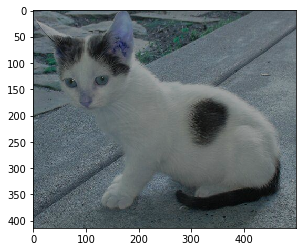

In [171]:
result = next(test_generator)

print(result[0].shape)
plt.imshow(result[0] / 255)

# 한글 예제 (OCR)

In [172]:
import io 

csv_file_path = "dataset/korean/label_image_map.csv"
lable_file = "dataset/korean/label.txt"

csv_file = io.open(csv_file_path, 'r', encoding='utf-8')
labels_file = io.open(lable_file, 'r', encoding='utf-8').read().splitlines()

# Map characters to indices.
label_dict = {}
count = 0
for label in labels_file:
    label_dict[label] = count
    count += 1

# Build the lists.
filenames = []
labels = []

for row in csv_file:
    path, label = row.strip().split(',')
    filenames.append('./korean/' + path)
    labels.append(label_dict[label])

print("csv file load finished")

csv file load finished


In [173]:
#print(labels)
print(labels_file)

['가', '각', '간', '갇', '갈', '감', '갑', '값', '갓', '강', '갖', '같', '갚', '갛', '개', '객', '걀', '걔', '거', '걱', '건', '걷', '걸', '검', '겁', '것', '겉', '게', '겨', '격', '겪', '견', '결', '겹', '경', '곁', '계', '고', '곡', '곤', '곧', '골', '곰', '곱', '곳', '공', '과', '관', '광', '괜', '괴', '굉', '교', '구', '국', '군', '굳', '굴', '굵', '굶', '굽', '궁', '권', '귀', '귓', '규', '균', '귤', '그', '극', '근', '글', '긁', '금', '급', '긋', '긍', '기', '긴', '길', '김', '깅', '깊', '까', '깍', '깎', '깐', '깔', '깜', '깝', '깡', '깥', '깨', '꺼', '꺾', '껌', '껍', '껏', '껑', '께', '껴', '꼬', '꼭', '꼴', '꼼', '꼽', '꽂', '꽃', '꽉', '꽤', '꾸', '꾼', '꿀', '꿈', '뀌', '끄', '끈', '끊', '끌', '끓', '끔', '끗', '끝', '끼', '낌', '나', '낙', '낚', '난', '날', '낡', '남', '납', '낫', '낭', '낮', '낯', '낱', '낳', '내', '냄', '냇', '냉', '냐', '냥', '너', '넉', '넌', '널', '넓', '넘', '넣', '네', '넥', '넷', '녀', '녁', '년', '념', '녕', '노', '녹', '논', '놀', '놈', '농', '높', '놓', '놔', '뇌', '뇨', '누', '눈', '눕', '뉘', '뉴', '늄', '느', '늑', '는', '늘', '늙', '능', '늦', '늬', '니', '닐', '님', '다', '닥', '닦', '단', '닫', '달', '닭', '닮', '담', '답', '닷', '당',

In [174]:
from subprocess import check_output
import random

seed = 1998

shuffled_indices = list(range(len(filenames)))  # shuffle 하기 -> 데이터 섞기
random.seed(seed)
random.shuffle(shuffled_indices)
filenames = [ filenames[i] for i in shuffled_indices]
labels = [  labels[i] for i in shuffled_indices  ]

print("List shuffle finished")

List shuffle finished


In [175]:
labels

[131,
 6,
 591,
 891,
 750,
 530,
 556,
 698,
 554,
 742,
 734,
 665,
 691,
 617,
 602,
 701,
 175,
 904,
 388,
 449,
 945,
 492,
 563,
 219,
 153,
 497,
 145,
 285,
 398,
 892,
 372,
 322,
 73,
 559,
 822,
 562,
 864,
 853,
 2,
 345,
 906,
 325,
 564,
 85,
 411,
 116,
 162,
 630,
 280,
 66,
 133,
 945,
 279,
 128,
 921,
 295,
 366,
 899,
 764,
 485,
 490,
 288,
 53,
 100,
 405,
 869,
 176,
 713,
 688,
 548,
 908,
 346,
 306,
 942,
 945,
 357,
 839,
 520,
 517,
 956,
 425,
 427,
 600,
 647,
 894,
 126,
 772,
 735,
 381,
 481,
 245,
 429,
 472,
 550,
 888,
 461,
 604,
 587,
 931,
 679,
 390,
 356,
 676,
 211,
 135,
 801,
 243,
 518,
 18,
 673,
 676,
 58,
 954,
 397,
 485,
 820,
 803,
 614,
 268,
 121,
 448,
 649,
 868,
 916,
 727,
 10,
 943,
 652,
 261,
 561,
 227,
 405,
 347,
 128,
 281,
 791,
 680,
 713,
 754,
 559,
 10,
 474,
 395,
 927,
 782,
 206,
 453,
 770,
 169,
 473,
 640,
 881,
 401,
 858,
 931,
 622,
 161,
 658,
 667,
 140,
 9,
 619,
 470,
 188,
 867,
 81,
 601,
 657,
 693,
 

131
6
591
891
750


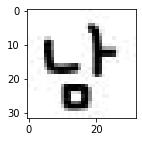

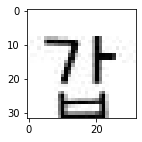

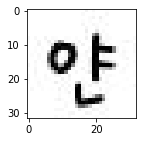

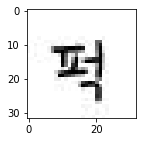

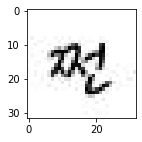

In [179]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0, 5):
    print(labels[i])
    
    img = mpimg.imread(filenames[i])
    
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap ='gray')

In [180]:
import cv2

X_data = []

total_count = 0
prev_count = 0
  
for image_path in filenames:
    image = cv2.imread(image_path)
    X_data.append(image)
    total_count += 1
    
    if total_count - prev_count > 5000:
      prev_count = total_count
      print('{} images added...'.format(total_count))
    
print("Image adding finished")

5001 images added...
10002 images added...
15003 images added...
20004 images added...
25005 images added...
30006 images added...
35007 images added...
40008 images added...
45009 images added...
Image adding finished


In [181]:
import numpy as np
from sklearn.model_selection import train_test_split

r = 0.20
X = np.array(X_data)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = r)

print("X_data:", X.shape)
print("y_labels:", y.shape)
print("\nX_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

X_data: (46060, 32, 32, 3)
y_labels: (46060,)

X_train: (36848, 32, 32, 3)
X_val: (9212, 32, 32, 3)
y_train: (36848,)
y_val: (9212,)


In [182]:
import keras.utils as utils


batch_size = 128
epochs = 3#300
num_classes = 980

y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

train_generator = ImageDataGenerator(rescale=1./255, 
                                     rotation_range=15, 
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15, 
                                     shear_range=0.2, 
                                     zoom_range=[0.8, 1.2])

val_generator = ImageDataGenerator(rescale=1./255)

train_data_flow = train_generator.flow(X_train, y_train, 
                                       batch_size=batch_size)
val_data_flow = val_generator.flow(X_val, y_val,
                                   batch_size=batch_size)

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

In [185]:
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten


model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

RMSprop = keras.optimizers.RMSprop(lr=0.001)
                     
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])

In [186]:
hist = model.fit_generator(train_data_flow,
                           epochs=1,
                           verbose=1,
                           steps_per_epoch = 230,
                           validation_data=val_data_flow,
                           validation_steps = 70)

230/230 [==============================] - 65s 281ms/step - loss: 6.8903 - accuracy: 7.1370e-04 - val_loss: 6.8898 - val_accuracy: 4.4643e-04
